In [1]:
import os 
os.chdir("/home/wvx67826/p99Bluesky/src/")


In [2]:
import asyncio
from collections import defaultdict
from p99Bluesky.devices.andor2Ad import Andor2Ad,StaticDirectoryProviderPlus 
from p99Bluesky.plans.ad_plans import AdPlan
from ophyd_async.core import DeviceCollector 
from ophyd_async.core._providers import StaticDirectoryProvider
from ophyd_async.core import DetectorTrigger
loop = asyncio.get_event_loop()
from bluesky.run_engine import RunEngine
from bluesky.callbacks.best_effort import BestEffortCallback
from bluesky.plans import count, scan 
bec = BestEffortCallback()
RE = RunEngine({})

In [3]:
df1 =  StaticDirectoryProviderPlus("/dls/p99/data/2024/cm37284-2/processing/test_bluesky/", "p99-")
with DeviceCollector():
    andor = Andor2Ad(
        "BL99P-EA-DET-03:",
        df1,
        "andor",
    )

In [4]:
andor_plans = AdPlan(andor)

In [5]:
docs = defaultdict(list)

def capture_emitted(name, doc):
    docs[name].append(doc)
RE(andor_plans.tiggerImg(andor,0.1),capture_emitted)

('ddbb66ab-ae64-4396-b9bc-56e5c85704f3',)

In [6]:
docs

defaultdict(list,
            {'start': [{'uid': 'ddbb66ab-ae64-4396-b9bc-56e5c85704f3',
               'time': 1715083477.7714896,
               'versions': {'ophyd': '1.9.0', 'bluesky': '1.13.0a3'},
               'scan_id': 1,
               'plan_type': 'generator',
               'plan_name': 'tiggerImg'}],
             'descriptor': [{'configuration': {'andor': {'data': {},
                 'timestamps': {},
                 'data_keys': {}}},
               'data_keys': {'andor': {'source': 'ca://BL99P-EA-DET-03:HDF5:FullFileName_RBV',
                 'shape': (512, 512),
                 'dtype': 'array',
                 'external': 'STREAM:',
                 'object_name': 'andor'},
                'andor-sum': {'source': 'ca://BL99P-EA-DET-03:HDF5:FullFileName_RBV',
                 'shape': (),
                 'dtype': 'number',
                 'external': 'STREAM:',
                 'object_name': 'andor'}},
               'name': 'primary',
               'object_key

In [7]:
import h5py
k =h5py.File("/dls/p99/data/2024/cm37284-2/processing/test_bluesky/p99-andor-hdf0.h5", 'r')


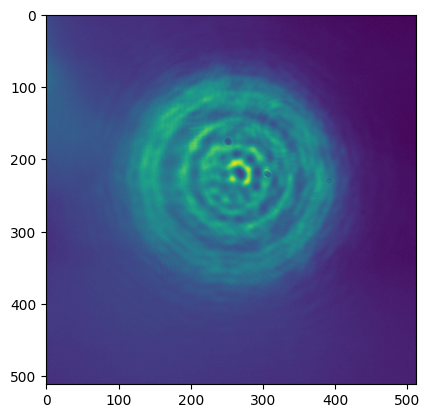

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
im = ax.imshow(k["entry"]["data"]["data"][0])


In [15]:
docs = defaultdict(list)
RE(andor_plans.takeImg(exposure = 0.1,
        n_img = 4,
        det_trig =  DetectorTrigger.internal),capture_emitted)

('bebb9ffe-3275-4254-a513-89032bfda4cb',)

In [16]:
docs

defaultdict(list,
            {'start': [{'uid': 'bebb9ffe-3275-4254-a513-89032bfda4cb',
               'time': 1715083601.3815055,
               'versions': {'ophyd': '1.9.0', 'bluesky': '1.13.0a3'},
               'scan_id': 3,
               'plan_type': 'generator',
               'plan_name': 'takeImg'}],
             'descriptor': [{'configuration': {'andor': {'data': {},
                 'timestamps': {},
                 'data_keys': {}}},
               'data_keys': {'andor': {'source': 'ca://BL99P-EA-DET-03:HDF5:FullFileName_RBV',
                 'shape': (512, 512),
                 'dtype': 'array',
                 'external': 'STREAM:',
                 'object_name': 'andor'},
                'andor-sum': {'source': 'ca://BL99P-EA-DET-03:HDF5:FullFileName_RBV',
                 'shape': (),
                 'dtype': 'number',
                 'external': 'STREAM:',
                 'object_name': 'andor'}},
               'name': 'primary',
               'object_keys'

In [13]:
k =h5py.File("/dls/p99/data/2024/cm37284-2/processing/test_bluesky/p99-andor-hdf2.h5", 'r')

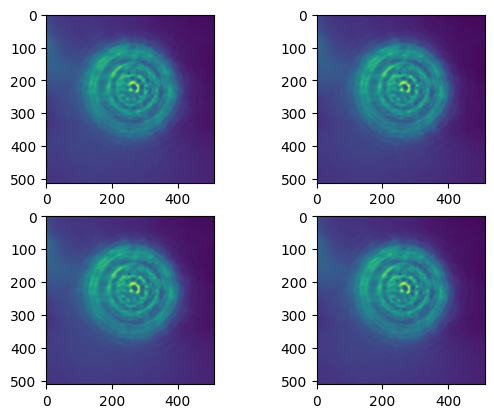

In [14]:
import math 
data = k["entry"]["data"]["data"]
for i in range(data.len()):
    plt.subplot(math.ceil(data.len()/2.0),2,i+1)   
    plt.imshow(data[i])